### Nesse notebook analisaremos um dataset contendo os dados de vendas do ano de 2019 referente à uma loja de eletrônicos. Nele visualizaremos dados de faturamento por mês, cidade e produto.

### As analises tem como objetivo ajudar nas tomadas de decisões do rumo da empresa, informando oportunidades e caminhos para aumentar tanto o engajamento como o volume de venda. Utilizamos como premissa de crescimento um percentual de +6% vs último ano.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Consolidando todos os dados de vendas

In [2]:
directory = './SalesData'

#Lista para armazenar os nomes dos arquivos csv
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

#Criando um novo data frame
all_data = pd.DataFrame()

# Loop para ler e concatenar os arquivos CSV
for file in csv_files:
    file_path = os.path.join(directory, file)  # Caminho completo do arquivo
    df = pd.read_csv(file_path)
    all_data = pd.concat([all_data, df])

#Criando um novo arquivo csv com todos os dados
all_data.to_csv('all_data.csv', index=False)

## Tratando a base de dados

    1 - Limpar a base (removendo linhas contendo 'NaN' e cabeçalho repetido)
    2 - Converter colunas para a tipagem correta
    3 - Adicionar colunas

In [3]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### #1 Limpando a base

In [4]:
# Deleta as linha contendo NaN
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')

# Remove os cabeçalhos repetidos
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


### #2 Corrigindo a tipagem das colunas

In [5]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')


### #3 Criando colunas

In [6]:
# Criando uma coluna com o mês
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

# Funções de split
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# Criando coluna com a cidade + estado
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

# Criando coluna com apenas o estado
all_data['State'] = all_data['Purchase Address'].apply(lambda x: get_state(x))

# Criando coluna com o ano
# all_data['Year'] = '20' + all_data['Order Date'].str[6:8]
# all_data['Year'] = all_data['Year'].astype('int32')

# Criando uma coluna 'Total Price' (Valor uni. * Quantidade)
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


In [7]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),MA,99.99


## --------------------------------------------------------------------------------------------------------------------------------------------------------------------------- <font color='DARKRED'>REPORT ANO 2019 E PROJEÇÃO 2020</font> ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## <font color='blue'>VENDAS</font>

### Analisando o faturamento consolidado por mês, a época de maior faturamento da loja é no último trimestre do ano. Isso ocorre devido a promoções de feriados e final de ano, como natal e ano novo.

### Projetamos um crescimento no faturamento de 6% vs o último ano.

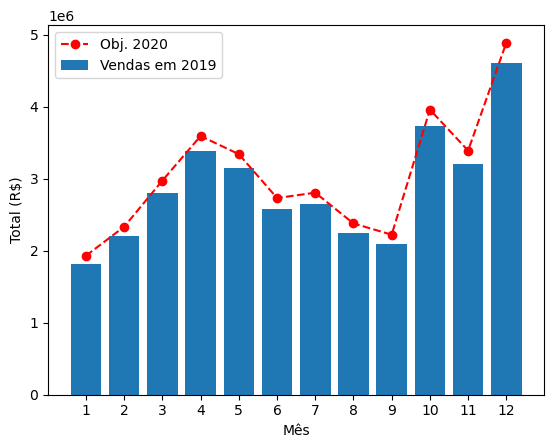

In [61]:
sales_2019 = results['Total Sales']

# Calcula o crescimento de 6% em relação a 2019
growth_factor = 1.06

# Calcula as vendas ponderadas com crescimento em relação a 2019
weighted_sales_2019 = sales_2019 * growth_factor

# Grafico
months = range(1, 13)
plt.bar(months, sales_2019, label='Vendas em 2019')
plt.plot(months, weighted_sales_2019, color='red', linestyle='--', marker='o', label='Obj. 2020')
plt.xticks(months)
plt.ylabel('Total (R$)')
plt.xlabel('Mês')
plt.legend()
plt.show()

### São Francisco (CA), Los Angeles (CA) e New York (NY) possuem os maiores faturamentos do ano. Enquanto, Portaland (ME), Austin (TX) e Portland (OR) representam os três piores.

C:\Users\andre\AppData\Local\Temp\ipykernel_24168\4131818119.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


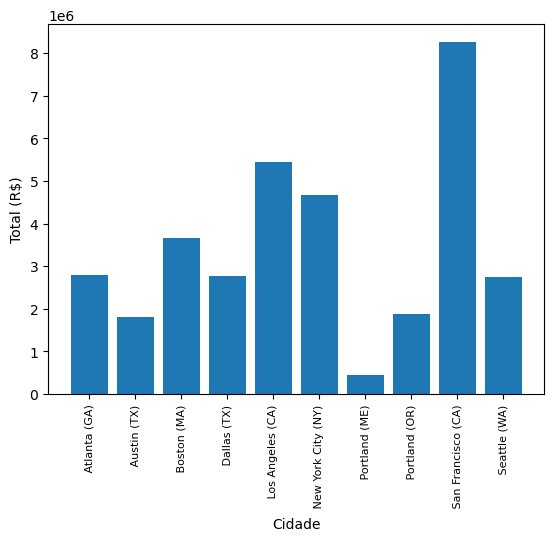

In [9]:
results = all_data.groupby('City').sum()

# Grafico
cities = [city for city, df in all_data.groupby('City')] # Ordenando igual ao groupby anterior

plt.bar(cities, results['Total Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Total (R$)')
plt.xlabel('Cidade')
plt.show()


In [10]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [11]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Total Sales,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),TX,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),MA,99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),CA,600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),CA,11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),CA,11.99,9


 ## <font color='blue'>MARKETING</font>

### Esse gráfico tem por finalidade demonstrar em qual periodo do dia há um número maior usuários efetuando compras.

### Podemos constatar que durante os períodos de 10 am-14 pm e 17 pm - 21pm, devemos realizar um maior número de ações promocionais no site, afim de incentivar a compra.

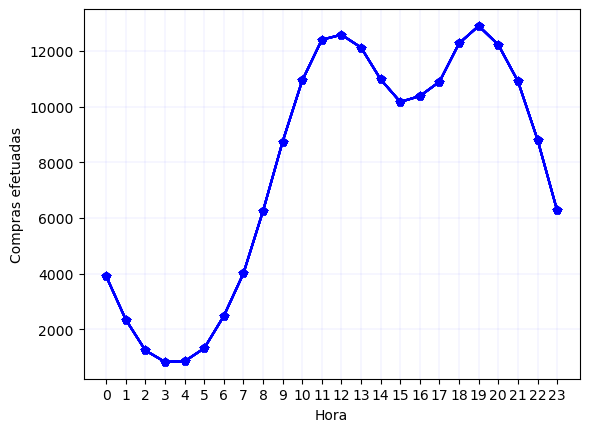

In [37]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count(),'-pb',)
plt.xlabel('Hora')
plt.ylabel('Compras efetuadas')
plt.grid(color='b', linestyle='-', linewidth=0.05)
plt.xticks(hours)
plt.show()


### Abaixo conseguimos visualizar as TOP 10 combinações de produtos comprados.

In [13]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()


C:\Users\andre\AppData\Local\Temp\ipykernel_24168\3896456695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [14]:

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

i=1

for key, value in count.most_common(10):
        print(f'{i}° - {key, value}')
        i+=1


1° - (('iPhone', 'Lightning Charging Cable'), 1005)
2° - (('Google Phone', 'USB-C Charging Cable'), 987)
3° - (('iPhone', 'Wired Headphones'), 447)
4° - (('Google Phone', 'Wired Headphones'), 414)
5° - (('Vareebadd Phone', 'USB-C Charging Cable'), 361)
6° - (('iPhone', 'Apple Airpods Headphones'), 360)
7° - (('Google Phone', 'Bose SoundSport Headphones'), 220)
8° - (('USB-C Charging Cable', 'Wired Headphones'), 160)
9° - (('Vareebadd Phone', 'Wired Headphones'), 143)
10° - (('Lightning Charging Cable', 'Wired Headphones'), 92)


### Uma possível ação promocional seria uma promoção de 'Smartphone' + 'Carregador' e/ou 'Fones de Ouvido', por um preço especial.

### Esse tipo de combinação (celular + eletrônico) representa 8 das 10 maiores combinações de compras feitas pelos clientes.

 ## <font color='blue'>FINANCEIRO</font>

C:\Users\andre\AppData\Local\Temp\ipykernel_24168\2011341868.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']
C:\Users\andre\AppData\Local\Temp\ipykernel_24168\2011341868.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(products, rotation='vertical', size=8)
C:\Users\andre\AppData\Local\Temp\ipykernel_24168\2011341868.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_sales = product_group.sum()['Total Sales']
C:\Users\andre\AppData\Local\Temp\ipykernel_24168\2011341868.py:21: UserW

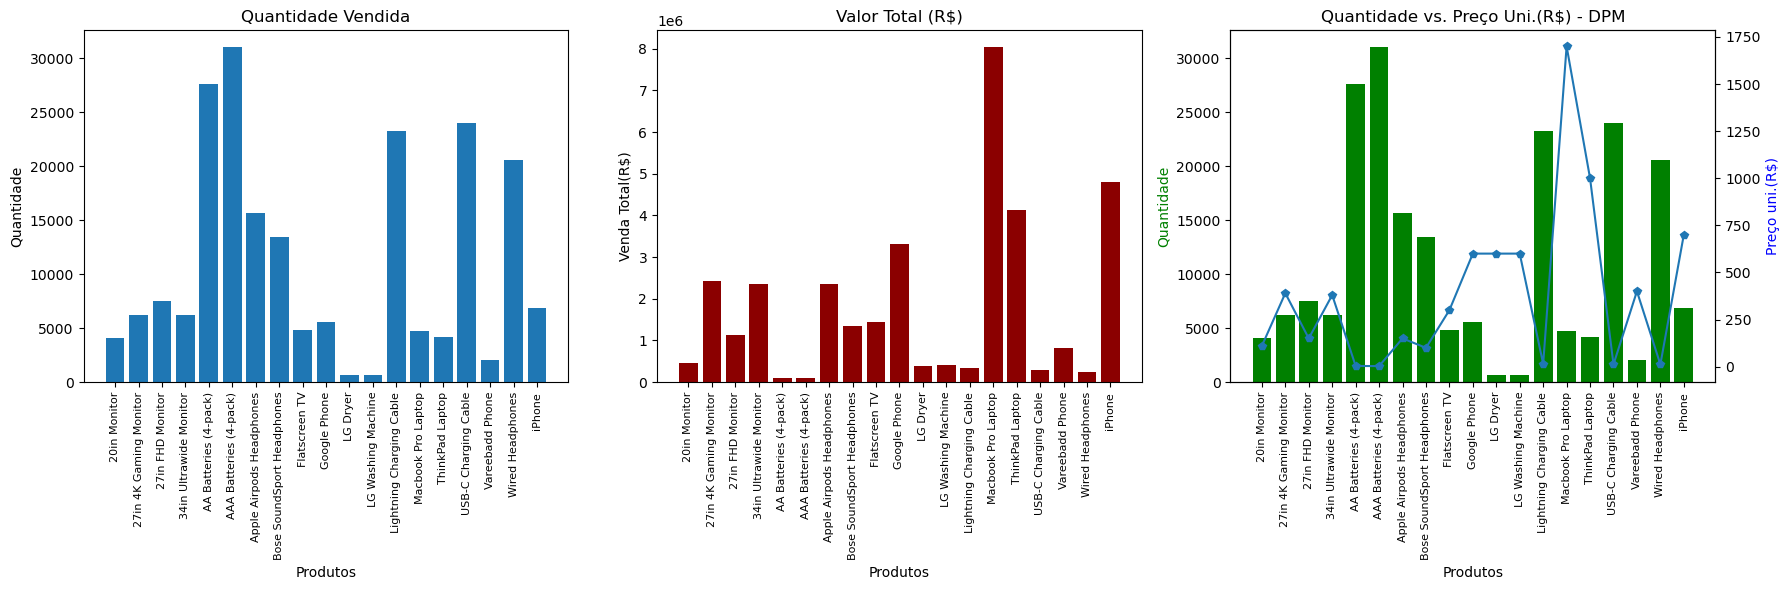

In [15]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Grafico 1
axes[0].bar(products, quantity_ordered)
axes[0].set_ylabel('Quantidade')
axes[0].set_xlabel('Produtos')
axes[0].set_xticklabels(products, rotation='vertical', size=8)
axes[0].set_title('Quantidade Vendida')

# Grafico 2
product_group = all_data.groupby('Product')
total_sales = product_group.sum()['Total Sales']

axes[1].bar(products, total_sales, color='darkred')
axes[1].set_ylabel('Venda Total(R$)')
axes[1].set_xlabel('Produtos')
axes[1].set_xticklabels(products, rotation='vertical', size=8)
axes[1].set_title('Valor Total (R$)')

# Grafico 3
prices = all_data.groupby('Product').mean()['Price Each']

ax1 = axes[2]
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'p-')

ax1.set_xlabel('Produtos')
ax1.set_ylabel('Quantidade', color='g')
ax2.set_ylabel('Preço uni.(R$)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax1.set_title('Quantidade vs. Preço Uni.(R$) - DPM')

plt.tight_layout()
plt.show()


### Por mais que os produtos do tipo bateria sejam os mais vendidos, eles são os que geram menor faturamento na rede. Portanto, não se vê necessário o investimento nessa categoria de produto para o próximo ano.

### O foco de 2020 deve ser a categoria de laptop's e smartphone's. Ambos representam os maiores faturamentos da rede no ano de 2019, com um grande mercado ainda a se explorar, quando comparamos as quantidades vendidas por cada categoria.